# Cyber Security Attacks Analysis

## Data importing

### Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import re

In [2]:
df = pd.read_csv('cybersecurity_attacks.csv')

## EDA (Exploratory Data Analysis)

In [3]:

# Exploratory Data Analysis (EDA)
# Checkout the Dataset
df.head().T

# List Columns
df.columns

# Shape of data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

# Dataset Info
df.info()

# Missing values check
df.isnull().sum().sort_values(ascending=False)

# Missing Value by Percentage
df.isnull().sum() / len(df) * 100

# Handling missing values
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

# Verify all missing values are handled
df.isnull().sum().sort_values(ascending=False)

# Explore the Device Information Column
df['Device Information'].value_counts()

# Extract 'Device'
df['Browser'] = df['Device Information'].str.split('/').str[0]

# Patterns to search for OS and devices
patterns = [r'Windows', r'Linux', r'Android', r'iPad', r'iPod', r'iPhone', r'Macintosh']

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  # Return 'Unknown' if no patterns match

# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

# Dropping the Device Information Column
df = df.drop('Device Information', axis=1)

# Extract time features from the Timestamp column
def extract_time_features(df, Timestamp):
    df[Timestamp] = pd.to_datetime(df[Timestamp])
    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek
    return df

# Call the function and store the result in a new DataFrame
df = extract_time_features(df, 'Timestamp')

# Check if new columns are created
print(df.head())

# Descriptive statistics for object type columns
df.describe(include='object').T


There are 40000 rows and 25 columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  

,count,unique,top,freq
Source IP Address,40000,40000,103.216.15.12,1
Destination IP Address,40000,40000,84.9.164.252,1
Protocol,40000,3,ICMP,13429
Packet Type,40000,2,Control,20237
Traffic Type,40000,3,DNS,13376
Payload Data,40000,40000,Qui natus odio asperiores nam. Optio nobis ius...,1
Malware Indicators,40000,2,IoC Detected,20000
Alerts/Warnings,40000,2,no,20067
Attack Type,40000,3,DDoS,13428
Attack Signature,40000,2,Known Pattern A,20076


In [4]:
data_cleaned = df

# df.to_csv("your_name.csv")
data_cleaned.to_csv("data_clean.csv")

## Data visualization

In [10]:
df = pd.read_csv("data_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   Timestamp               40000 non-null  object 
 2   Source IP Address       40000 non-null  object 
 3   Destination IP Address  40000 non-null  object 
 4   Source Port             40000 non-null  int64  
 5   Destination Port        40000 non-null  int64  
 6   Protocol                40000 non-null  object 
 7   Packet Length           40000 non-null  int64  
 8   Packet Type             40000 non-null  object 
 9   Traffic Type            40000 non-null  object 
 10  Payload Data            40000 non-null  object 
 11  Malware Indicators      40000 non-null  object 
 12  Anomaly Scores          40000 non-null  float64
 13  Alerts/Warnings         40000 non-null  object 
 14  Attack Type             40000 non-null

In [39]:
import plotly.express as px

# Plotting histogram for Malware Attacks by Month
plt_month = px.histogram(df, x='Month', color='Malware Indicators', title='Number of Malware Attacks by Month')
plt_month.update_layout(width=800, height=480)  # Setting size to (10, 6)
plt_month.show()


In [40]:
# Plotting histogram for Malware Attacks by Protocol
plt_protocol = px.histogram(df, x='Protocol', color='Malware Indicators', title='Number of Malware Attacks by Protocol')
plt_protocol.update_layout(width=800, height=480)  # Setting size to (10, 6)
plt_protocol.show()


In [41]:
# Plotting pie chart for Traffic Distribution
plt_traffic = px.pie(df, names='Traffic Type', title='Traffic Distribution')
plt_traffic.update_layout(width=800, height=480)  # Setting size to (10, 6)
plt_traffic.show()


In [38]:
# Plotting pie chart for Attack Type Distribution
plt_attack_type = px.pie(df, names='Attack Type', title='Attack Type Distribution')
plt_attack_type.update_layout(width=800, height=480)  # Setting size to (10, 6)
plt_attack_type.show()


In [37]:
import plotly.graph_objs as go

# Filter data for each attack type
malware_data = df[df['Attack Type'] == 'Malware']['Packet Length']
intrusion_data = df[df['Attack Type'] == 'Intrusion']['Packet Length']
ddos_data = df[df['Attack Type'] == 'DDoS']['Packet Length']

# Create histograms for each attack type
malware_histogram = go.Histogram(x=malware_data, name='Malware', opacity=0.7)
intrusion_histogram = go.Histogram(x=intrusion_data, name='Intrusion', opacity=0.7)
ddos_histogram = go.Histogram(x=ddos_data, name='DDoS', opacity=0.7)

# Create layout
layout = go.Layout(title='Packet Length Distribution for Different Attack Types',
                   xaxis=dict(title='Packet Length'),
                   yaxis=dict(title='Frequency'),
                   width=800, height=480)  # Setting size to (10, 6)

# Create figure
fig_packet_length = go.Figure(data=[malware_histogram, intrusion_histogram, ddos_histogram], layout=layout)
fig_packet_length.show()


## 中文圖示

### 網路流量量隨時間變化

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

chinese_font = FontProperties(fname='c:/USERS/ADMIN/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/NOTOSANSTC-VARIABLEFONT_WGHT.TTF')  # 修改為您的字型文件路徑

# 绘制按月份分布的恶意软件攻击直方图
plt_month = px.histogram(df, x='Month', color='Malware Indicators', title='恶意软件攻击按月份分布')
plt_month.update_layout(width=800, height=480)  # 设置大小为 (10, 6)
plt_month.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Browser', 'Device/OS', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek', 'monthly_traffic_volume'] but received: 月

### 生成惡意流量來源數據

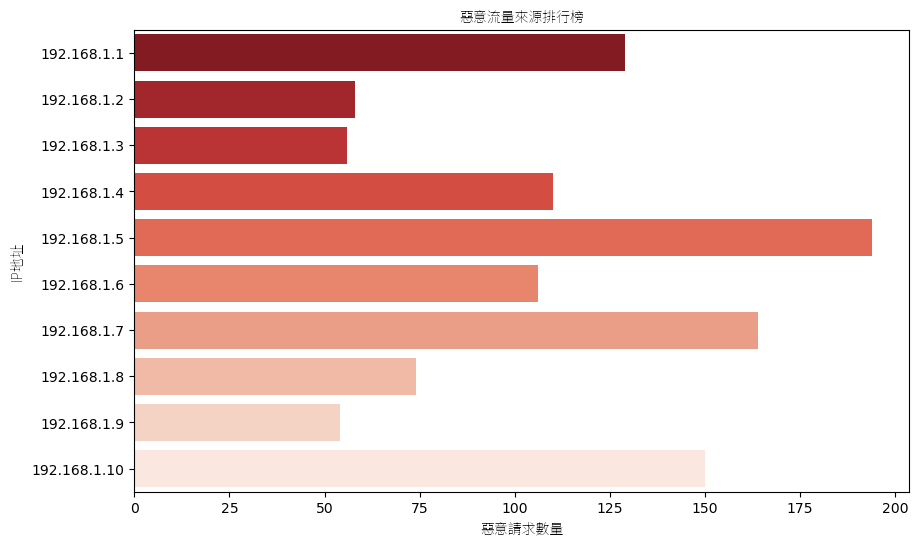

In [8]:
# 生成惡意流量來源數據
top_sources = pd.DataFrame({
    'ip_address': [f'192.168.1.{i}' for i in range(1, 11)],
    'malicious_requests': np.random.randint(50, 200, size=10)
})

# 繪製惡意流量來源條形圖
plt.figure(figsize=(10, 6))
sns.barplot(x='malicious_requests', y='ip_address', data=top_sources, palette='Reds_r')
plt.title('惡意流量來源排行榜', fontproperties=chinese_font)
plt.xlabel('惡意請求數量', fontproperties=chinese_font)
plt.ylabel('IP地址', fontproperties=chinese_font)
plt.savefig('Top_Sources_of_Malicious_Traffic.png')
plt.show()

### 檢測到的威脅類型（圓餅圖）

findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
C:\Users\Admin\AppData\Local\Temp\ipykernel_2952\918098543.py:16: UserWarning: Glyph 24801 (\N{CJK UNIFIED IDEOGRAPH-60E1}) missing from current font.
  plt.savefig('Distribution_of_Detected_Threats.png')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2952\918098543.py:16: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from current font.
  plt.savefig('Distribution_of_Detected_Threats.png')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2952\918098543.py:16: UserWarning: Glyph 36575 (\N{CJK UNIFIED IDEOGRAPH-8EDF}) missing from current font.
  plt.savefig('Distribution_of_Detected_Threats.png')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2952\918098543.py:16: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from current font.
  plt.savefig(

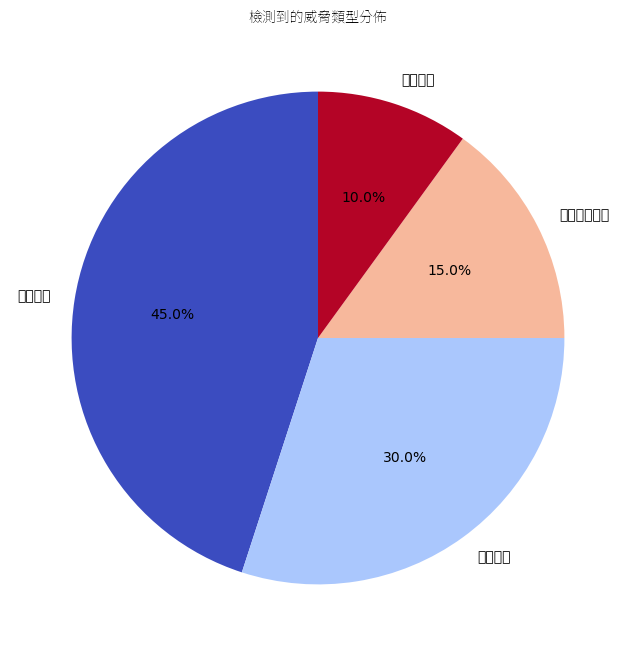

In [ ]:
# 檢測到的威脅類型（圓餅圖）

# 生成數據
threat_types = pd.Series({
    '惡意軟件': 45,
    '網絡釣魚': 30,
    '拒絕服務攻擊': 15,
    '勒索軟件': 10
})

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
threat_types.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('檢測到的威脅類型分佈', fontproperties=chinese_font)
plt.ylabel('', fontproperties=chinese_font)
plt.savefig('Distribution_of_Detected_Threats.png')
plt.show()


### 繪製事件趨勢圖

findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: 

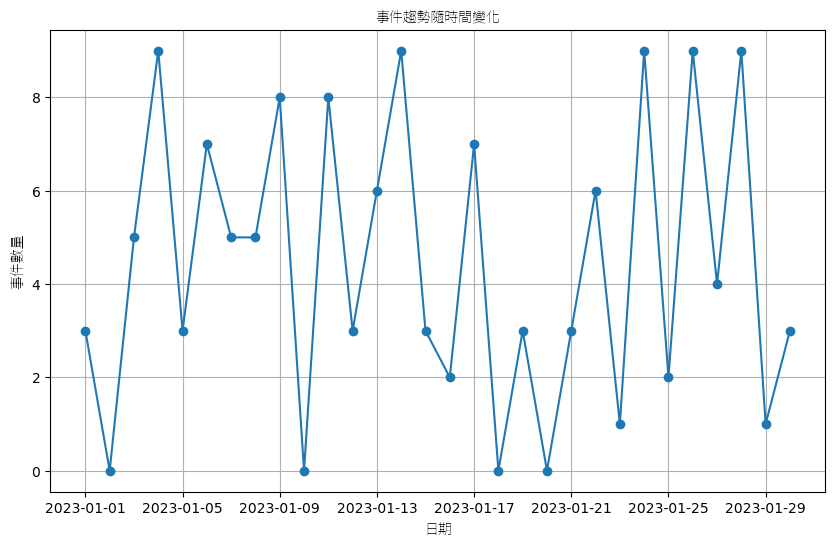

In [ ]:
# 繪製事件趨勢圖


# 生成數據
incident_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=30, freq='D'),
    'incidents': np.random.randint(0, 10, size=30)
})

# 繪製事件趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(incident_data['date'], incident_data['incidents'], marker='o', linestyle='-')
plt.title('事件趨勢隨時間變化', fontproperties=chinese_font)
plt.xlabel('日期', fontproperties=chinese_font)
plt.ylabel('事件數量', fontproperties=chinese_font)
plt.grid(True)
plt.savefig('Incident_Trends_Over_Time.png')
plt.show()

### 用戶身份驗證嘗試（熱圖）

findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: 

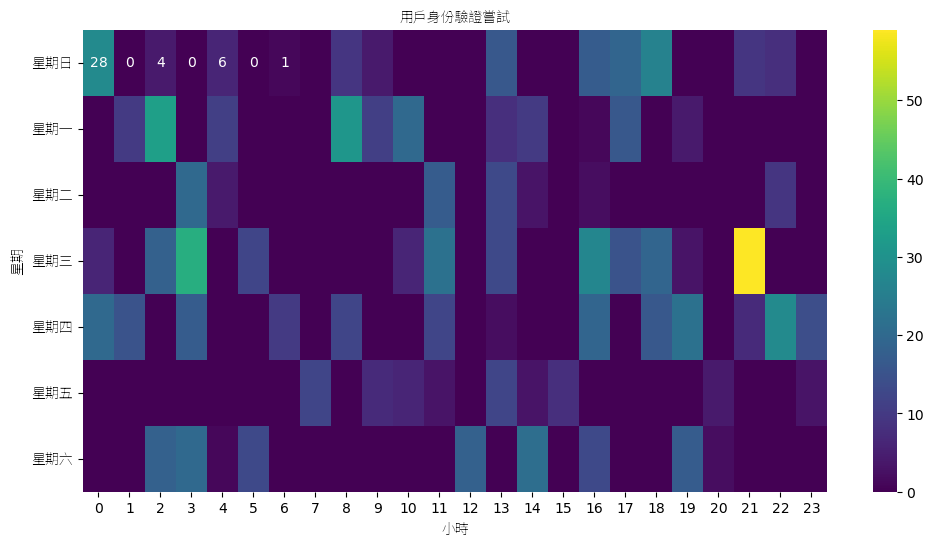

In [ ]:
# 用戶身份驗證嘗試（熱圖）


# 生成數據
np.random.seed(0)  # For reproducibility
auth_data_raw = pd.DataFrame({
    'day': np.random.choice(range(1, 8), size=100),
    'hour': np.random.choice(range(0, 24), size=100),
    'attempts': np.random.randint(1, 20, size=100)
})

# 清理數據
auth_data_cleaned = auth_data_raw.drop_duplicates().dropna()

# 樞軸數據
auth_data_pivot = auth_data_cleaned.pivot_table(index='day', columns='hour', values='attempts', aggfunc='sum').fillna(0)

# 繪製熱圖
plt.figure(figsize=(12, 6))
sns.heatmap(auth_data_pivot, cmap='viridis', annot=True, fmt='g', cbar=True)
plt.title('用戶身份驗證嘗試', fontproperties=chinese_font)
plt.xlabel('小時', fontproperties=chinese_font)
plt.ylabel('星期', fontproperties=chinese_font)
plt.xticks(np.arange(0.5, 24.5, 1), np.arange(0, 24, 1))
plt.yticks(np.arange(0.5, 7.5, 1), ['星期日', '星期一', '星期二', '星期三', '星期四', '星期五', '星期六'], rotation=0, fontproperties=chinese_font)
plt.savefig('User_Authentication_Attempts.png')
plt.show()

### 繪製堆疊條形圖

findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: sans-serif
C:\Users\Admin\AppData\Local\Temp\ipykernel_2952\2302096572.py:18: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7C

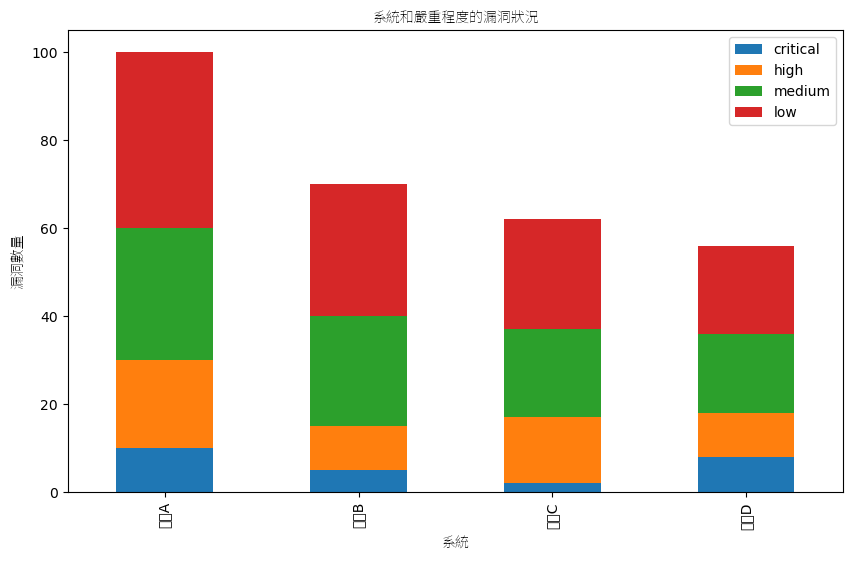

In [ ]:
# 繪製堆疊條形圖


# 生成數據
vulnerability_data = pd.DataFrame({
    'system': ['系統A', '系統B', '系統C', '系統D'],
    'critical': [10, 5, 2, 8],
    'high': [20, 10, 15, 10],
    'medium': [30, 25, 20, 18],
    'low': [40, 30, 25, 20]
})

# 繪製堆疊條形圖
vulnerability_data.set_index('system').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('系統和嚴重程度的漏洞狀況', fontproperties=chinese_font)
plt.xlabel('系統', fontproperties=chinese_font)
plt.ylabel('漏洞數量', fontproperties=chinese_font)
plt.savefig('Vulnerability_Status_by_System_and_Severity.png')
plt.show()


## Summary

---

Scenario
- **About the Company:**
  Incribo offers cutting-edge synthetic data generation tailored for cybersecurity needs.
  	
- **Problem Statement:**
  Addressing the need for precise and actionable insights to enhance cybersecurity posture.

---

Proposed Solution
- **Strategy:**
  Utilize the synthetic dataset to extract actionable insights and support strategic cybersecurity decisions.
  
- **Deliverables:**
  1. **Business Task Statement:** Clearly define the cybersecurity objectives and tasks.
  2. **Data Sources Description:** Outline the sources and relevance of data used.
  3. **Data Cleaning Documentation:** Detail the cleaning processes to ensure data integrity.
  4. **Analysis Summary:** Present the analysis methods and findings.
  5. **Visualizations and Key Findings:** Highlight critical insights through visual data representation.
  6. **Top Recommendations:** Provide prioritized recommendations based on the analysis.

---

- **Task:**
  Explicitly state the importance of Incribo's synthetic cyber dataset in identifying and mitigating cybersecurity threats, demonstrating the analyst's expertise in data interpretation and strategy formulation.

---

Prepare
- **Data Sources:**
  Data requires rigorous cleaning and adheres to ROCCC (Relevant, Original, Comprehensive, Consistent, and Correct) standards, ensuring high-quality input for analysis.
  
- **Data Cleaning:**
  Utilized Python in Jupyter Notebook for efficient data cleaning and manipulation. Documented each step meticulously to ensure reproducibility and transparency, showcasing the analyst’s technical proficiency.



By refining the presentation to emphasize the value added by analysts, this document aims to reinforce their importance in the cybersecurity landscape.
1. **Network Traffic Volume Over Time**
   - Objective: Monitor fluctuations in network traffic to identify abnormal patterns that may indicate potential threats or breaches.
   - Value: Helps in proactive detection and response planning based on traffic volume trends.
   - Example: Line plot showcasing hourly or daily traffic volumes over a specified period.
 
2. **Top Sources of Malicious Traffic**
   - Objective: Identify IP addresses responsible for the highest number of malicious requests.
   - Value: Pinpoints potential attackers and facilitates targeted mitigation strategies.
   - Example: Bar chart illustrating the number of malicious requests per IP address.
 
3. Types of Detected Threats
   - Objective: Understand the distribution of detected threats (e.g., malware, phishing, DoS) within the network.
   - Value: Prioritizes threat response efforts based on prevalence and severity.
   - Example: Pie chart displaying the percentage breakdown of different threat types.
 
4. Incident Trends Over Time
   - Objective: Track the frequency and severity of security incidents over time.
   - Value: Enables trend analysis and prediction of potential escalation points.
   - Example: Line graph depicting the number of security incidents recorded daily or monthly.
  
5. User Authentication Attempts
   - Objective: Analyze patterns in user authentication attempts across days and hours.
   - Value: Detects anomalous authentication patterns indicative of unauthorized access attempts.
   - Example: Heatmap illustrating authentication attempts by day of the week and hour of the day.
 
6. Vulnerability Status by System and Severity
   - Objective: Assess vulnerabilities across different systems categorized by severity levels (e.g., critical, high, medium, low).
   - Value: Guides prioritization of patching and mitigation efforts based on system criticality and vulnerability severity.
   - Example: Stacked bar chart showing the number of vulnerabilities per system by severity.
 



---

**Process**

  - **Detection and Response Planning:** Analyze traffic volume trends to identify potential threats.
  - **Targeted Mitigation:** Focus on potential attackers and prioritize threat response efforts.
  - **Trend Analysis:** Predict potential escalation points and anomalous authentication patterns to enhance patching and mitigation strategies.


---

**Share**

•  DDoS Attack Detection:
•	Recognize patterns of high traffic volume and specific packet characteristics indicative of DDoS attacks.
•	Response: Activate DDoS mitigation tools, alert IT security teams.
•  Credential Stuffing:
•	Identify patterns of multiple login attempts from different IP addresses within short time frames.
•	Response: Implement multi-factor authentication (MFA), lock accounts after several failed attempts.
•  Insider Threats:
•	Detect unusual access patterns to sensitive data by internal employees.
•	Response: Conduct thorough investigations, enforce least privilege access controls.

---

Act

- **Recommendations:**
  - **Regular Monitoring:** Continuous monitoring and updating of visualizations to adapt to changing network behaviors.
  - **Collaborative Analysis:** Encourage teamwork between analysts and other stakeholders for comprehensive threat interpretation and response.
  - **Adaptive Strategies:** Develop and implement adaptive strategies based on evolving threats and insights derived from visual data analysis.

---

Understanding Patterns
- **Pattern Recognition:**
  - **Threat Detection:** Identifying patterns indicative of potential threats.
  - **Targeted Strategies:** Develop targeted strategies for vulnerability management and incident response.

- **Outcome Improvement:**
  Demonstrate how understanding these patterns enhances incident response and overall cybersecurity outcomes, reinforcing the value of the analyst’s expertise.

---
Recommendations
- Regular Monitoring: Continuously monitor and update visualizations to capture real-time changes in network behavior and threat landscape.
- Collaborative Analysis: Foster collaboration between analysts and stakeholders to interpret visual insights and implement effective security measures.
- Adaptive Strategies: Develop adaptive strategies based on evolving threat trends and insights derived from visualizations.



